In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from scipy.stats import norm
from utils import simulateSigma

height = 64
width = 64
image0 = np.zeros((height, width), dtype=np.uint8) 

# Error_std-Noise_std

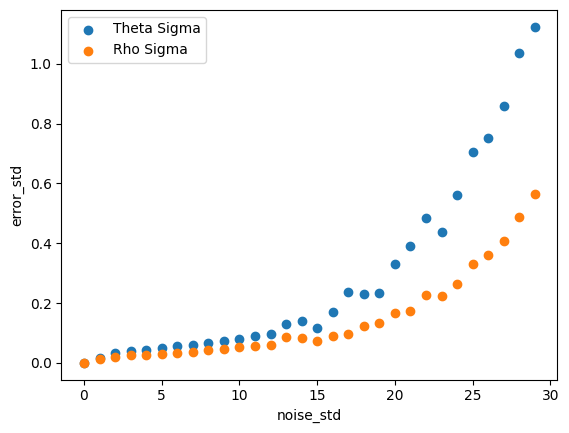

In [2]:
thetaSigmaList = []
rhoSigmaList = []
high = 180
low = 70
start = 0
end = 30
noiseList = range(start, end)

# 检查当前文件夹中是否存在Results路径
if not os.path.exists("Results"):
    os.makedirs("Results")

for noise in noiseList:
    # print(f"===========noise {noise}==========")
    thetaSigma, rhoSigma = simulateSigma(image0, noise, 70, 180, iterNum=5000)
    thetaSigmaList.append(thetaSigma)
    rhoSigmaList.append(rhoSigma)

# 将三个list转换为NumPy数组
noiseList = np.array(noiseList)
thetaSigmaList = np.array(thetaSigmaList)
rhoSigmaList = np.array(rhoSigmaList)

# 保存为.npy文件
np.save(f'Results/Noise_start{start}_end{end}_high{high}_low{low}.npy', [noiseList, thetaSigmaList, rhoSigmaList])

plt.figure()
plt.scatter(noiseList, thetaSigmaList, label='Theta Sigma')
plt.scatter(noiseList, rhoSigmaList, label='Rho Sigma')
plt.xlabel("noise_std")
plt.ylabel("error_std")
plt.legend()
plt.savefig(f"Results/Noise_start{start}_end{end}_high{high}_low{low}.png")

# Noise_std load data and draw curve

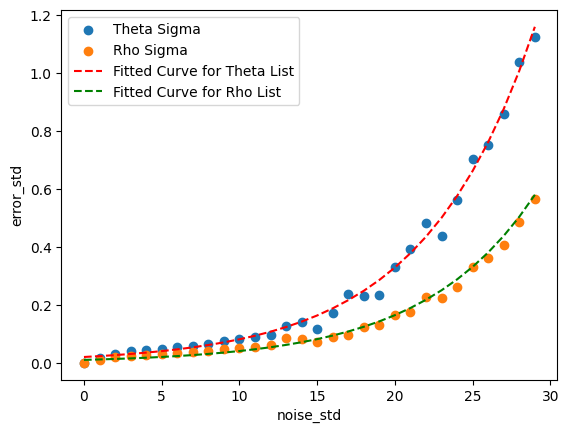

In [8]:
deltaList, thetaSigmaList, rhoSigmaList = np.load("Results/Noise_start0_end30_high180_low70.npy")
def func(x, a, b, c):
    return a + b * np.exp(c * x)

plt.figure()
plt.scatter(deltaList, thetaSigmaList, label='Theta Sigma')
plt.scatter(deltaList, rhoSigmaList, label='Rho Sigma')
plt.xlabel("noise_std")
plt.ylabel("error_std")
plt.plot(deltaList, func(deltaList, 0, 0.02, 0.14), 'r--', label='Fitted Curve for Theta List')
plt.plot(deltaList, func(deltaList, 0, 0.01, 0.14), 'g--', label='Fitted Curve for Rho List')
plt.legend()